# Example model in Tensorflow v2 with Keras API

Within this example the main library within tensorflow will be demonstrated. Keras is high-level API for ML/DL. Most of the time it will be the only sublibrary required during projects. For this example the Fashion MNIST dataset will be used. A classic, all too well known dataset. 

In [22]:
import tensorflow
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


## Data Preprocessing

In [12]:
fashion_mnist=keras.datasets.fashion_mnist
(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()

In [13]:
x_val,x_train=x_train[:5000]/255.0,x_train[5000:]/255.0
y_val,y_train=y_train[:5000],y_train[5000:]

In [14]:
class_names=["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

## Sequential Keras API

In [16]:
model=keras.Sequential()

In [17]:
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300,activation='relu'))
model.add(keras.layers.Dense(150,activation='relu'))
model.add(keras.layers.Dense(75,activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax'))

In [18]:
model.compile(keras.optimizers.Adam(learning_rate=0.0001),
              loss=keras.losses.sparse_categorical_crossentropy,metrics=['accuracy'])

In [19]:
history=model.fit(x=x_train,y=y_train,batch_size=32,epochs=10,validation_data=(x_val,y_val))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 8s 146us/sample - loss: 0.6027 - accuracy: 0.7984 - val_loss: 0.4308 - val_accuracy: 0.8546
Epoch 2/10
55000/55000 [==============================] - 7s 130us/sample - loss: 0.4106 - accuracy: 0.8561 - val_loss: 0.3998 - val_accuracy: 0.8586
Epoch 3/10
55000/55000 [==============================] - 7s 133us/sample - loss: 0.3672 - accuracy: 0.8694 - val_loss: 0.3475 - val_accuracy: 0.8782
Epoch 4/10
55000/55000 [==============================] - 8s 144us/sample - loss: 0.3404 - accuracy: 0.8783 - val_loss: 0.3572 - val_accuracy: 0.8724
Epoch 5/10
55000/55000 [==============================] - 7s 135us/sample - loss: 0.3195 - accuracy: 0.8859 - val_loss: 0.3321 - val_accuracy: 0.8832
Epoch 6/10
55000/55000 [==============================] - 7s 132us/sample - loss: 0.3045 - accuracy: 0.8897 - val_loss: 0.3175 - val_accuracy: 0.8824
Epoch 7/10
55000/55000 [===========================

## Functional Keras API

In [11]:
input_layer=keras.layers.Input(shape=[None,28,28])
conv_1=keras.layers.Conv2D(14,kernel_size=(2,2),activation='relu',padding='SAME')(input_layer)
conv_2=keras.layers.Conv2D(14,kernel_size=(5,5),activation='relu',padding='SAME')(input_layer)
concat=keras.layers.Concatenate()([conv_1,conv_2])
output=keras.layers.Dense(10,activation='softmax')(concat)
functional_model=keras.models.Model(inputs=[input_layer],outputs=[output])

## Evaluate model performance

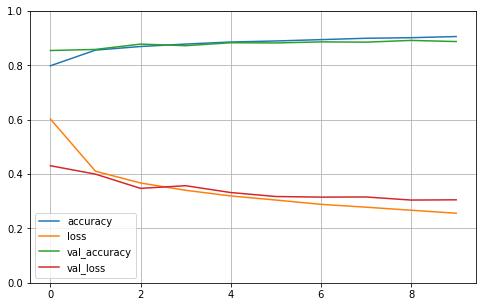

In [20]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()